<a href="https://colab.research.google.com/github/MiltonVillarroel/Sistemas-mal-condicionados/blob/main/SISTEMAS_MAL_CONDICIONADOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SISTEMAS MAL CONDICIONADOS**
Un sistema mal condicionado es aquel en el que pequeñas variaciones en los datos de entrada (como los coeficientes o términos independientes) provocan grandes cambios en la solución. Esto indica que el sistema es muy sensible a errores numéricos o de redondeo.

## **Número de condición (cond(A))**:

Este número mide la sensibilidad de la solución del sistema frente a pequeños cambios en los datos.  
Se calcula como el producto de la norma de la matriz \(A\) y la norma de su inversa:

$\text{cond}(A) = \|A\| \cdot \|A^{-1}\|$

Donde la norma es la raiz cuadrada del producto interno de la matriz consigo misma

$\|A\|=\sqrt{\langle A, A \rangle }$

Si $\text{cond}(A)$ es grande (por ejemplo, mayor que \(10^6\)), el sistema está mal condicionado.

##**Determinante (det(A)):**
Si el determinante de la matriz
A es muy cercano a cero, indica que la matriz está casi singular y el sistema puede ser mal condicionado.

##**$A\cdot A^{-1}≃I$ Desvío de la matriz Identidad**
En un sistema mal condicionado, aunque matemáticamente $A\cdot A^{-1}=I$ debería seguir siendo la matriz identidad, en la práctica, debido a la sensibilidad de la matriz a pequeños errores de redondeo o perturbaciones, esta operación puede producir una matriz que se desvía de la identidad. Esto ocurre porque la matriz es cercana a ser singular (sus columnas o filas son casi linealmente dependientes), y pequeños errores en el cálculo de la inversa se amplifican.

##**Linealmente independientes pero con pendientes muy cercanas**
En un sistema mal condicionado las pendientes son muy similares ocasionando que graficamente se pueda visualizar elementos linealmente dependientes aparentemente

##**Cambios en los elementos del sistema**
Pequeños cambios en los elementos del sistema ocasionan grandes alteraciones en los resultados

## **Ejemplo de Matriz mal Condicionada**
###**Matriz de Hilbert**
Una matriz de Hilbert es una matriz cuadrada de elementos reales, cuya entrada en la fila 𝑖 y columna 𝑗 está dada por la fórmula:

$H(i,j) = \frac{1}{i + j - 1}$

Es una matriz simétrica y positiva definida, pero es mal condicionada, lo que significa que pequeñas perturbaciones en los datos pueden generar grandes errores en la solución de sistemas lineales asociados a ella.

$H=\begin{pmatrix}
1 & \frac{1}{2} & \frac{1}{3} \\
\frac{1}{2} & \frac{1}{3} & \frac{1}{4} \\
\frac{1}{3} & \frac{1}{4} & \frac{1}{5}
\end{pmatrix}
$


##**EJEMPLO DE UN SISTEMA MAL CONDICIONADO**

$\begin{pmatrix}
1 & 2 & 3 \\
1.0001 & 2.0001 & 3.0001 \\
1 & 2 & 3.0002
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2 \\
x_3
\end{pmatrix}
=\begin{pmatrix}
1 \\
2 \\
3
\end{pmatrix}$




In [ ]:
import numpy as np

In [ ]:
A=np.array([[1,2,3],[1.0001,2.0001,3.0001],[1,2,3.0002]])
b=np.array([[1],[2],[3]])
x=np.linalg.inv(A).dot(b)
print(x)


[[ 29999.00000013]
 [-29999.00000007]
 [ 10000.        ]]


##**Condicional**

In [ ]:
condicional=np.linalg.cond(A)
# np.sum(A**2)**(1/2)*np.sum(np.linalg.inv(A)**2)**(1/2)
print('Condicional del sistema: ',condicional)

Condicional del sistema:  262129.3402665794


##**Determinante**

In [ ]:
det=np.linalg.det(A)
print('Determinante del sistema: ',det)

Determinante del sistema:  -1.999999999995666e-08


##**$A\cdot A^{-1}≃I$ Desvío de la matriz Identidad**

In [ ]:
print(A.dot(np.linalg.inv(A)))

[[ 1.00000000e+00  0.00000000e+00 -9.09494702e-13]
 [-3.83866450e-12  1.00000000e+00  2.00685690e-13]
 [-2.72839884e-12  0.00000000e+00  1.00000000e+00]]


## **Cambios pequeños con grandes efectos**

In [ ]:
A2=np.array([[1.1,2,3],[1.0001,2.0001,3.0001],[1,2,3.0002]])
b=np.array([[1],[2],[3]])
x2=np.linalg.inv(A2).dot(b)
print('Cambio de 1 a 1.1 en el primer elemento de la matriz A')
print('Antes del Cambio\n',x)
print('Después del Cambio\n',x2)

Cambio de 1 a 1.1 en el primer elemento de la matriz A
Antes del Cambio
 [[ 29999.00000013]
 [-29999.00000007]
 [ 10000.        ]]
Después del Cambio
 [[  -12.00392141]
 [-5989.95678443]
 [ 3998.03929414]]


## **Visualizaión Gráfica**

In [ ]:
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

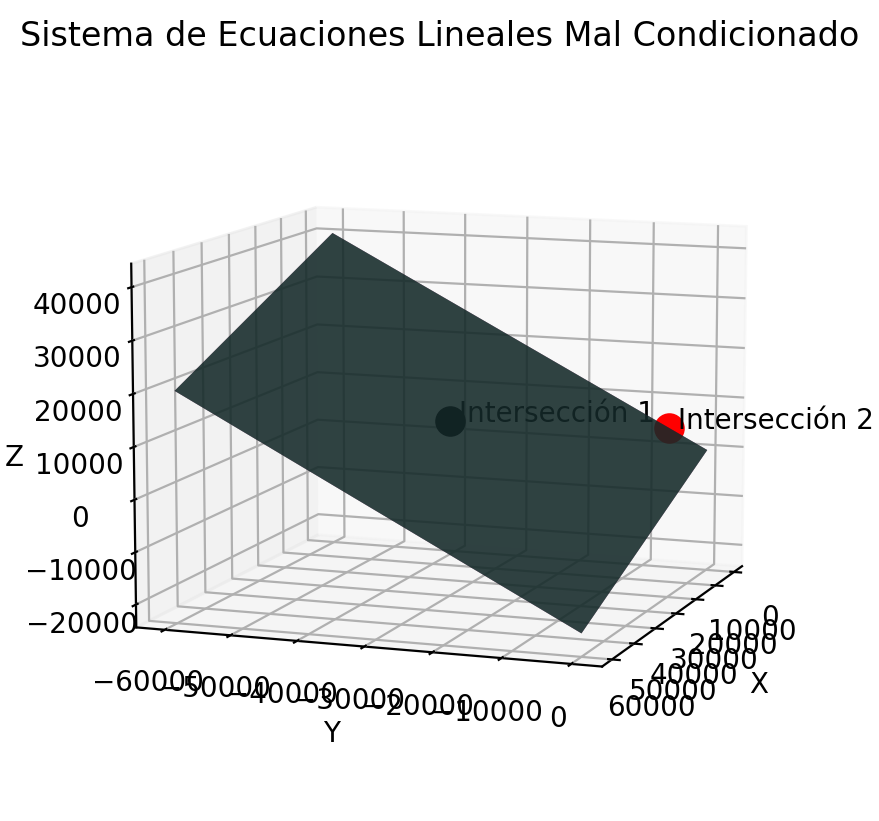

In [ ]:
# Crear una figura y un eje 3D
fig = plt.figure(dpi=200)
vista3D = fig.add_subplot(111, projection='3d')

# Crear un rango de valores para x y y
xg = np.linspace(0, 60000, 10)
yg = np.linspace(-60000,0, 10)
xg, yg = np.meshgrid(xg, yg) #Matriz de coordenadas

# Definir los planos en función de x y y
z1 = (1-xg-2*yg)/3
z2 = (2-1.0001*xg-2.0001*yg)/3.0001
z3 = (3-xg-2*yg)/3.0002


# Graficar los planos
vista3D.plot_surface(xg, yg, z1, alpha=0.5, rstride=100, cstride=100, color='blue')
vista3D.plot_surface(xg, yg, z2, alpha=0.5, rstride=100, cstride=100, color='red')
vista3D.plot_surface(xg, yg, z3, alpha=0.5, rstride=100, cstride=100, color='green')

vista3D.scatter(x[0][0], x[1][0], x[2][0],color='black', s=100)
vista3D.scatter(x2[0][0], x2[1][0], x2[2][0],color='red', s=100)

# Configurar el gráfico
vista3D.set_title('Sistema de Ecuaciones Lineales Mal Condicionado')
vista3D.set_xlabel('X')
vista3D.set_ylabel('Y')
vista3D.set_zlabel('Z')
vista3D.text(x[0][0], x[1][0], x[2][0],' Intersección 1', color='black')
vista3D.text(x2[0][0], x2[1][0], x2[2][0],' Intersección 2', color='black')
vista3D.view_init(elev=10, azim=20)

# Mostrar la gráfica
plt.show()

